#EDA


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("sample_dataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1045211,1045211,2020-03-09 15:09:26,577588686219,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,...,40.6153,-79.4545,972,Public relations account executive,1997-10-23,fff87d4340ef756a592eac652493cf6b,1362841766,40.420453,-78.865012,0
1,547406,547406,2019-08-22 15:49:01,30376238035123,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,...,42.8250,-124.4409,217,Retail merchandiser,1928-10-01,d0ad335af432f35578eea01d639b3621,1345650541,42.758860,-123.636337,0
2,110142,110142,2019-03-04 01:34:16,4658490815480264,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,...,39.9636,-79.7853,184,Systems developer,1945-11-04,87f26e3ea33f4ff4c7a8bad2c7f48686,1330824856,40.475159,-78.898190,0
3,1285953,1285953,2020-06-16 20:04:38,3514897282719543,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,...,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,9c34015321c0fa2ae6fd20f9359d1d3e,1371413078,43.767506,-76.542384,0
4,271705,271705,2019-05-14 05:54:48,6011381817520024,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,...,41.6423,-104.1974,635,Product/process development scientist,1973-07-13,198437c05676f485e9be04449c664475,1336974888,41.040392,-104.092324,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           10000 non-null  int64  
 1   Unnamed: 0             10000 non-null  int64  
 2   trans_date_trans_time  10000 non-null  object 
 3   cc_num                 10000 non-null  int64  
 4   merchant               10000 non-null  object 
 5   category               10000 non-null  object 
 6   amt                    10000 non-null  float64
 7   first                  10000 non-null  object 
 8   last                   10000 non-null  object 
 9   gender                 10000 non-null  object 
 10  street                 10000 non-null  object 
 11  city                   10000 non-null  object 
 12  state                  10000 non-null  object 
 13  zip                    10000 non-null  int64  
 14  lat                    10000 non-null  float64
 15  lon

In [93]:
df.shape

(10000, 24)

In [94]:
# Class distribution
class_counts = df['is_fraud'].value_counts()
fraud_pct = class_counts[1] / class_counts.sum() * 100

print("\nClass Distribution:\n", class_counts)
print(f"\nFraud Percentage: {fraud_pct:.4f}%")


Class Distribution:
 is_fraud
0    9941
1      59
Name: count, dtype: int64

Fraud Percentage: 0.5900%


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           10000 non-null  int64  
 1   Unnamed: 0             10000 non-null  int64  
 2   trans_date_trans_time  10000 non-null  object 
 3   cc_num                 10000 non-null  int64  
 4   merchant               10000 non-null  object 
 5   category               10000 non-null  object 
 6   amt                    10000 non-null  float64
 7   first                  10000 non-null  object 
 8   last                   10000 non-null  object 
 9   gender                 10000 non-null  object 
 10  street                 10000 non-null  object 
 11  city                   10000 non-null  object 
 12  state                  10000 non-null  object 
 13  zip                    10000 non-null  int64  
 14  lat                    10000 non-null  float64
 15  lon

#Preprocessing

In [96]:
# Drop leakage / identifier columns
df1 =df.copy()
df1.drop(columns=['cc_num', 'trans_num', 'Unnamed: 0','Unnamed: 0.1'], inplace=True)


In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  10000 non-null  object 
 1   merchant               10000 non-null  object 
 2   category               10000 non-null  object 
 3   amt                    10000 non-null  float64
 4   first                  10000 non-null  object 
 5   last                   10000 non-null  object 
 6   gender                 10000 non-null  object 
 7   street                 10000 non-null  object 
 8   city                   10000 non-null  object 
 9   state                  10000 non-null  object 
 10  zip                    10000 non-null  int64  
 11  lat                    10000 non-null  float64
 12  long                   10000 non-null  float64
 13  city_pop               10000 non-null  int64  
 14  job                    10000 non-null  object 
 15  dob

#Feature Engineering

In [98]:
# Convert to datetime
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])
df1['dob'] = pd.to_datetime(df1['dob'])

# Time features
df1['transaction_hour'] = df1['trans_date_trans_time'].dt.hour
df1['transaction_day'] = df1['trans_date_trans_time'].dt.day
df1['transaction_month'] = df1['trans_date_trans_time'].dt.month

# Age feature
df1['customer_age'] = (
    (df1['trans_date_trans_time'] - df1['dob']).dt.days // 365
)

# Drop raw datetime + unnecessary columns
columns_to_drop = [
    'unix_time',
    'trans_date_trans_time',
    'dob',
    'merchant',
    'first', 'last',
    'street',
    'city',
    'job',
    'zip',
    'lat', 'long',
    'merch_lat', 'merch_long'
]

df1.drop(columns=columns_to_drop, axis=1, inplace=True)

# Night transaction flag
df1['is_night'] = df1['transaction_hour'].isin([22,23,0,1,2,3,4,5]).astype(int)

# High transaction amount
p99 = df1['amt'].quantile(0.99)
df1['is_high_amount'] = (df1['amt'] > p99).astype(int)

# Log-transform amount
df1['log_amt'] = np.log1p(df1['amt'])

# Amount vs global mean
global_mean = df1['amt'].mean()
df1['amt_to_mean'] = df1['amt'] / (global_mean + 1e-9)




In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           10000 non-null  object 
 1   amt                10000 non-null  float64
 2   gender             10000 non-null  object 
 3   state              10000 non-null  object 
 4   city_pop           10000 non-null  int64  
 5   is_fraud           10000 non-null  int64  
 6   transaction_hour   10000 non-null  int32  
 7   transaction_day    10000 non-null  int32  
 8   transaction_month  10000 non-null  int32  
 9   customer_age       10000 non-null  int64  
 10  is_night           10000 non-null  int64  
 11  is_high_amount     10000 non-null  int64  
 12  log_amt            10000 non-null  float64
 13  amt_to_mean        10000 non-null  float64
dtypes: float64(3), int32(3), int64(5), object(3)
memory usage: 976.7+ KB


In [100]:
# Keep only useful low-cardinality categorical features
categorical_features = ['category', 'gender', 'state']

In [101]:
# Numeric features
numeric_features = [
    'amt', 'transaction_hour', 'transaction_day', 'transaction_month',
    'customer_age', 'is_night', 'is_high_amount', 'log_amt', 'amt_to_mean', 'city_pop'
]

In [102]:
df1.to_csv("feature_engineered.csv", index=False)
print("✔ feature_engineered.csv saved")

✔ feature_engineered.csv saved


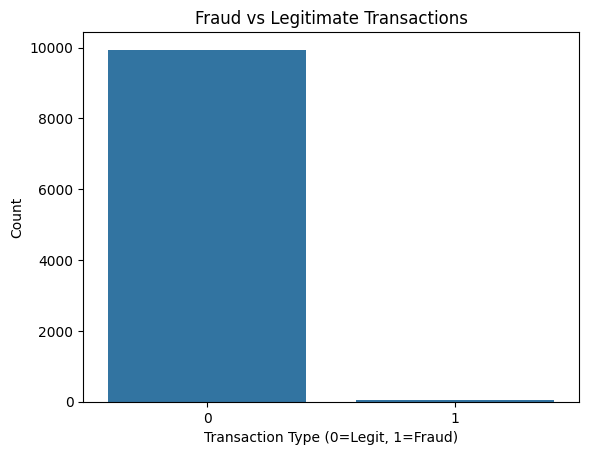

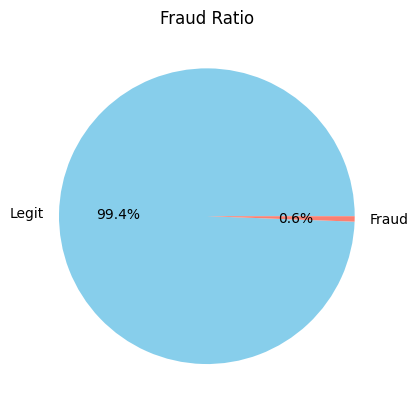

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='is_fraud', data=df1)
plt.title('Fraud vs Legitimate Transactions')
plt.xlabel('Transaction Type (0=Legit, 1=Fraud)')
plt.ylabel('Count')
plt.show()

# Optional: Pie chart
plt.pie(df1['is_fraud'].value_counts(), labels=['Legit','Fraud'], autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title('Fraud Ratio')
plt.show()

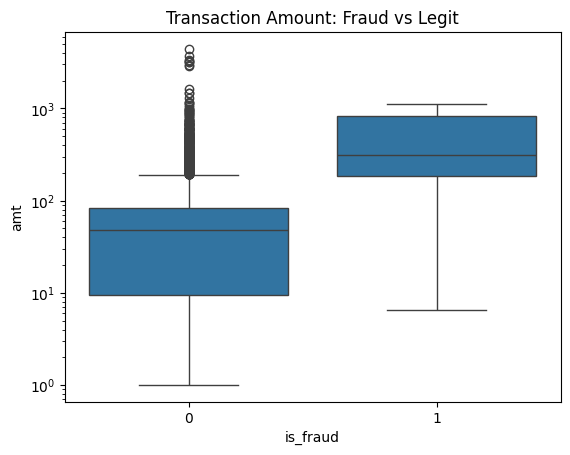

In [104]:
sns.boxplot(x='is_fraud', y='amt', data=df1)
plt.yscale('log')  # optional if distribution is skewed
plt.title('Transaction Amount: Fraud vs Legit')
plt.show()

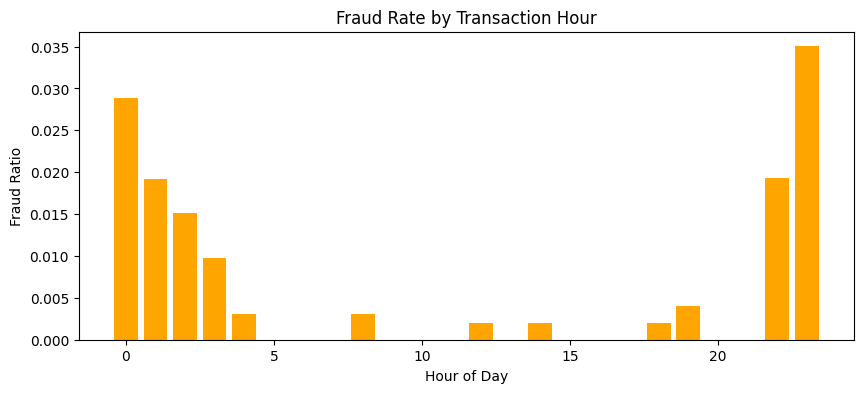

In [105]:
hourly_fraud = df1.groupby('transaction_hour')['is_fraud'].sum()
hourly_total = df1.groupby('transaction_hour')['is_fraud'].count()
fraud_ratio = hourly_fraud / hourly_total

plt.figure(figsize=(10,4))
plt.bar(fraud_ratio.index, fraud_ratio.values, color='orange')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Ratio')
plt.title('Fraud Rate by Transaction Hour')
plt.show()

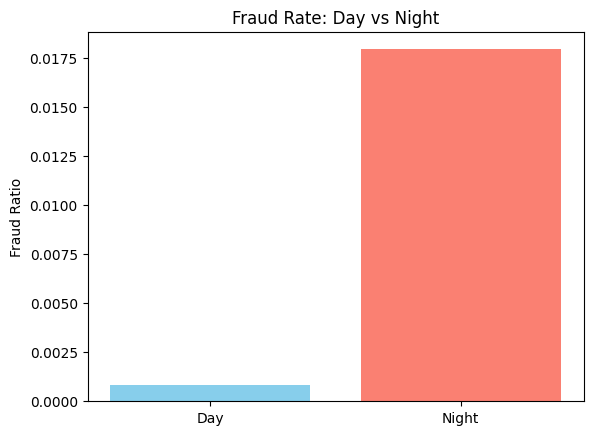

In [106]:
night_fraud = df1.groupby('is_night')['is_fraud'].sum()
night_total = df1.groupby('is_night')['is_fraud'].count()
fraud_ratio = night_fraud / night_total

plt.bar(['Day','Night'], fraud_ratio.values, color=['skyblue','salmon'])
plt.ylabel('Fraud Ratio')
plt.title('Fraud Rate: Day vs Night')
plt.show()

#Model Training

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           10000 non-null  object 
 1   amt                10000 non-null  float64
 2   gender             10000 non-null  object 
 3   state              10000 non-null  object 
 4   city_pop           10000 non-null  int64  
 5   is_fraud           10000 non-null  int64  
 6   transaction_hour   10000 non-null  int32  
 7   transaction_day    10000 non-null  int32  
 8   transaction_month  10000 non-null  int32  
 9   customer_age       10000 non-null  int64  
 10  is_night           10000 non-null  int64  
 11  is_high_amount     10000 non-null  int64  
 12  log_amt            10000 non-null  float64
 13  amt_to_mean        10000 non-null  float64
dtypes: float64(3), int32(3), int64(5), object(3)
memory usage: 976.7+ KB


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

target_col = 'is_fraud'
X = df1.drop(columns=[target_col])
y = df1[target_col].values

In [109]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [110]:
from sklearn.preprocessing import RobustScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Logistic Regression
lr_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(
        class_weight='balanced', max_iter=1000, solver='saga'
    ))
])

# Random Forest
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1
    ))
])

# XGBoost
xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(np.sum(y_train == 0) / np.sum(y_train == 1)),
        random_state=42
    ))
])

In [112]:
# Train models
lr_pipeline.fit(X_train, y_train)
print("✔ Logistic Regression trained")

rf_pipeline.fit(X_train, y_train)
print("✔ Random Forest trained")

xgb_pipeline.fit(X_train, y_train)
print("✔ XGBoost trained")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


✔ Logistic Regression trained
✔ Random Forest trained
✔ XGBoost trained


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:19:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [56]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Average Precision (PR AUC):", average_precision_score(y_test, y_proba))

# Evaluate
print("\n--- Logistic Regression ---")
evaluate_model(lr_pipeline, X_test, y_test)

print("\n--- Random Forest ---")
evaluate_model(rf_pipeline, X_test, y_test)

print("\n--- XGBoost ---")
evaluate_model(xgb_pipeline, X_test, y_test)


--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.96      1988
           1       0.06      0.83      0.10        12

    accuracy                           0.91      2000
   macro avg       0.53      0.87      0.53      2000
weighted avg       0.99      0.91      0.95      2000

Confusion Matrix:
 [[1819  169]
 [   2   10]]
ROC AUC: 0.9685613682092555
Average Precision (PR AUC): 0.43734268918695146

--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      0.33      0.50        12

    accuracy                           1.00      2000
   macro avg       1.00      0.67      0.75      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1988    0]
 [   8    4]]
ROC AUC: 0.9984071093226023
Average Precision (PR AUC): 0.789616402116402

---

In [113]:
import joblib

joblib.dump(lr_pipeline, "lr_fraud_pipeline.pkl")
joblib.dump(rf_pipeline, "rf_fraud_pipeline.pkl")
joblib.dump(xgb_pipeline, "xgb_fraud_pipeline.pkl")

print("✔ All pipelines saved")

✔ All pipelines saved


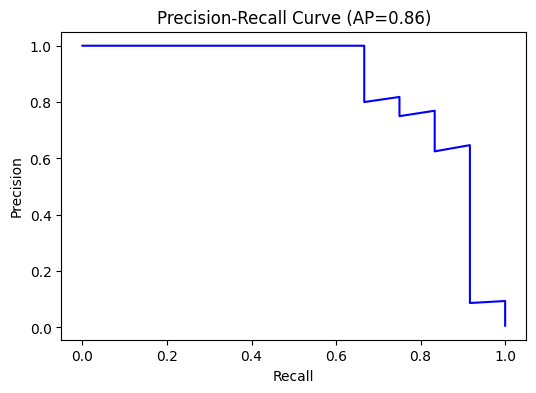

In [115]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_scores = xgb_pipeline.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={ap:.2f})')
plt.show()

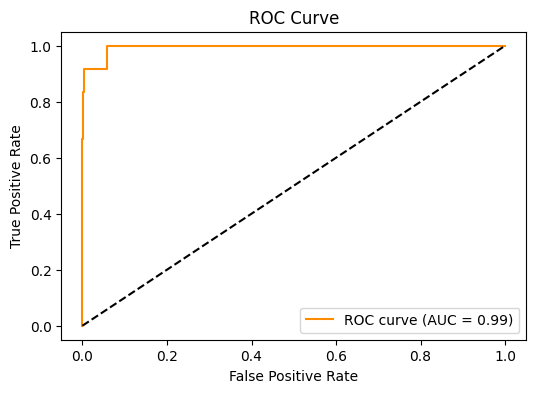

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

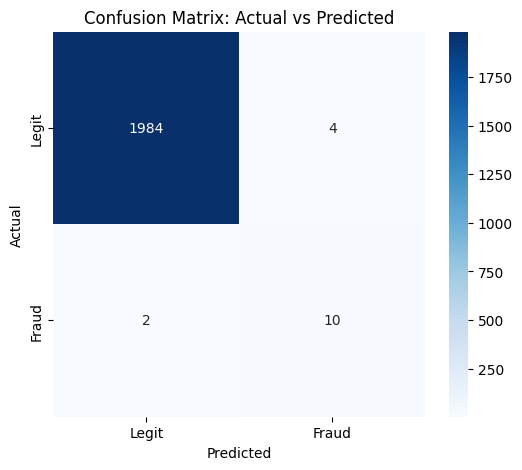

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using your chosen model (XGBoost)
y_pred = xgb_pipeline.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit','Fraud'], yticklabels=['Legit','Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.show()

In [132]:
amt = 20000.0                # very high amount
hour = 2                    # night transaction
day = 15
month = 11
age = 35
gender = 'M'
category = 'shopping_net'   # high-risk category
state = 'NY'

# Create input DataFrame
input_df = pd.DataFrame({
    'amt': [amt],
    'transaction_hour': [hour],
    'transaction_day': [day],
    'transaction_month': [month],
    'customer_age': [age],
    'is_night': [1 if hour in [22,23,0,1,2,3,4,5] else 0],
    'is_high_amount': [1 if amt > 500 else 0],
    'log_amt': [np.log1p(amt)],
    'amt_to_mean': [amt / 200],
    'city_pop': [100000],
    'category': [category],
    'gender': [gender],
    'state': [state]
})

# Make prediction
threshold = 0.5  # define your fraud probability threshold
pred_prob = xgb_pipeline.predict_proba(input_df)[:,1][0]
pred_label = 1 if pred_prob >= threshold else 0

print("Predicted:", "FRAUD" if pred_label == 1 else "LEGITIMATE")
prob_percent = pred_prob * 100
print(f"Fraud Probability: {prob_percent:.4f}%")

Predicted: FRAUD
Fraud Probability: 51.8563%
